In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [101]:
# load the data
data = pd.read_csv("D:/BA-UC/Capstone/data/diabetes_012_health_indicators_BRFSS2015.csv")
data.shape

(253680, 22)

In [102]:
# display the columns
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [103]:
data = data.apply(np.ceil).astype(int)
pd.set_option('display.max_columns', None)
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [105]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [106]:
# the unique values in the "Diabetes_012" column
unique_values = data["Diabetes_012"].unique()
unique_values

array([0, 2, 1])

In [107]:
# The maximum value in column "diabetes_012" is 2 and there are 3 unique values in the column, so I need to transform it into a binary variable 
data['Diabetes_012'] = data['Diabetes_012'].replace({1:1, 2:1})

data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.364355,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [108]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 23968


#### There are 253680 records, and 23968 of them are duplicates, it's 9.448%. The dataset has 21 independent variables, including 14 binary variables and 7 categorical variables. After calculation, we can see that the probability of two people having exactly the same data is less than 1 in 4 trillion. Therefore, I'm inclined to believe these duplicates are caused by data entry, and I'll remove them.

In [109]:

# Identify duplicate records
duplicates = data.duplicated()
print("Duplicate records:\n", duplicates)

# View duplicate records
duplicate_records = data[data.duplicated()]
print("Duplicate records:\n", duplicate_records)

# Count duplicate records
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

# Drop duplicate records, keeping the first occurrence
data_cleaned = data.drop_duplicates(keep='first')
print("Data after dropping duplicates:\n", data_cleaned)

# Optionally, save the cleaned data
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


Duplicate records:
 0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool
Duplicate records:
         Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
1242               1       1         1          1   27       1       0   
1563               0       0         0          1   21       1       0   
2700               0       0         0          1   32       0       0   
3160               0       0         0          1   21       0       0   
3332               0       0         0          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253492             1       1         1          1   33       0       0   
253550             0       0         0          1   25       0       0   
253563             0       0         1          1   24       1       0   
253597          

In [110]:
data_cleaned.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000
mean,0.172638,0.454378,0.441697,0.959523,28.685711,0.465687,0.044765,0.103216,0.733283,0.612907,0.794760,0.060728,0.946059,0.092838,2.601205,3.506425,4.676425,0.185558,0.439141,8.085982,4.980388,5.889980
std,0.377935,0.497915,0.496590,0.197075,6.787118,0.498822,0.206787,0.304242,0.442244,0.487086,0.403877,0.238832,0.225903,0.290206,1.064778,7.714644,9.047423,0.388751,0.496283,3.093975,0.992922,2.092546
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


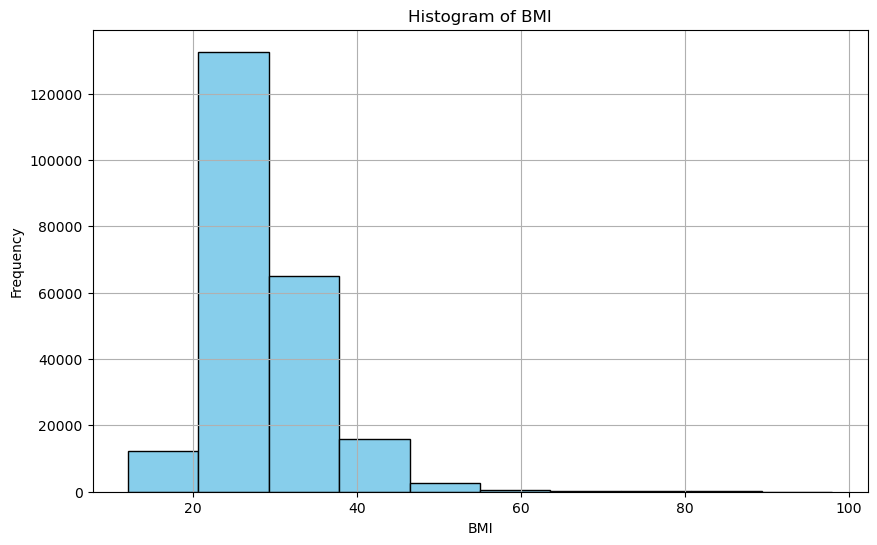

In [76]:
# Create a histogram for the 'BMI' column
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['BMI'], bins=10, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.grid(True)

# Show the plot
plt.show()

In [111]:
# outliers detection

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_cleaned['BMI'].quantile(0.25)
Q3 = data_cleaned['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_cleaned[(data_cleaned['BMI'] < lower_bound) | (data_cleaned['BMI'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers: {num_outliers}")
data_cleaned = data_cleaned[(data_cleaned['BMI'] >= lower_bound) & (data_cleaned['BMI'] <= upper_bound)]
data_cleaned.shape

Number of outliers: 5638


(224074, 22)

In [112]:
correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.255445  0.201345   0.075064  0.218020   
HighBP                    0.255445  1.000000  0.284938   0.110521  0.211508   
HighChol                  0.201345  0.284938  1.000000   0.095202  0.109059   
CholCheck                 0.075064  0.110521  0.095202   1.000000  0.046173   
BMI                       0.218020  0.211508  0.109059   0.046173  1.000000   
Smoker                    0.047329  0.075930  0.074596  -0.003631 -0.003095   
Stroke                    0.097740  0.125143  0.089436   0.028106  0.011516   
HeartDiseaseorAttack      0.166995  0.202062  0.176358   0.050473  0.046694   
PhysActivity             -0.095498 -0.099548 -0.061520  -0.003634 -0.116223   
Fruits                   -0.023172 -0.017561 -0.025891   0.018391 -0.068118   
Veggies                  -0.042336 -0.041865 -0.026585  -0.000448 -0.045232   
HvyAlcoholConsump        -0.064913 -0.012563 -0.0187

#### According to this correlation matrix, we can see the correlations between these variables. It seems that the features are independent and don't have strong correlations, so there is no potential multicolinearity.

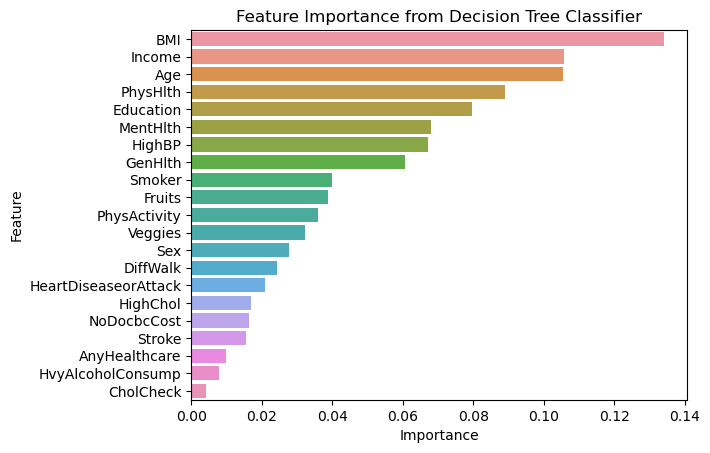

In [102]:
# Define the features and target
features = data_cleaned.drop(columns=['Diabetes_012'])
target = data_cleaned['Diabetes_012']

# For classification tasks
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(features, target)
importances_clf = tree_clf.feature_importances_

# For regression tasks (if needed)
# tree_reg = DecisionTreeRegressor(random_state=42)
# tree_reg.fit(features, target)
# importances_reg = tree_reg.feature_importances_

# Convert to DataFrame for better visualization
importance_data = pd.DataFrame({'Feature': features.columns, 'Importance': importances_clf})
importance_data.sort_values(by='Importance', ascending=False, inplace=True)

# Plot bar plot
sns.barplot(x='Importance', y='Feature', data=importance_data)
plt.title('Feature Importance from Decision Tree Classifier')
plt.show()



In [38]:
# Frequency Distribution for Binary and Categorical Features.

# Identify binary and categorical variables
binary_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
categorical_vars = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Function to calculate frequency distribution
def frequency_distribution(data_cleaned, variables):
    freq_dist = {}
    for var in variables:
        counts = data_cleaned[var].value_counts()
        proportions = data_cleaned[var].value_counts(normalize=True)
        freq_dist[var] = pd.DataFrame({'Count': counts, 'Proportion': proportions})
    return freq_dist

# Calculate frequency distribution for binary and categorical variables
binary_freq_dist = frequency_distribution(data_cleaned, binary_vars)
categorical_freq_dist = frequency_distribution(data_cleaned, categorical_vars)

# Display the results
for var, dist in binary_freq_dist.items():
    print(f"Frequency Distribution for {var}:")
    print(dist)
    print()

for var, dist in categorical_freq_dist.items():
    print(f"Frequency Distribution for {var}:")
    print(dist)
    print()


Frequency Distribution for Diabetes_012:
               Count  Proportion
Diabetes_012                    
0             186589    0.832712
1              37485    0.167288

Frequency Distribution for HighBP:
         Count  Proportion
HighBP                    
0       123356    0.550515
1       100718    0.449485

Frequency Distribution for HighChol:
           Count  Proportion
HighChol                    
0         125317    0.559266
1          98757    0.440734

Frequency Distribution for CholCheck:
            Count  Proportion
CholCheck                    
1          214917    0.959134
0            9157    0.040866

Frequency Distribution for Smoker:
         Count  Proportion
Smoker                    
0       119546    0.533511
1       104528    0.466489

Frequency Distribution for Stroke:
         Count  Proportion
Stroke                    
0       214081    0.955403
1         9993    0.044597

Frequency Distribution for HeartDiseaseorAttack:
                       Count  Pr

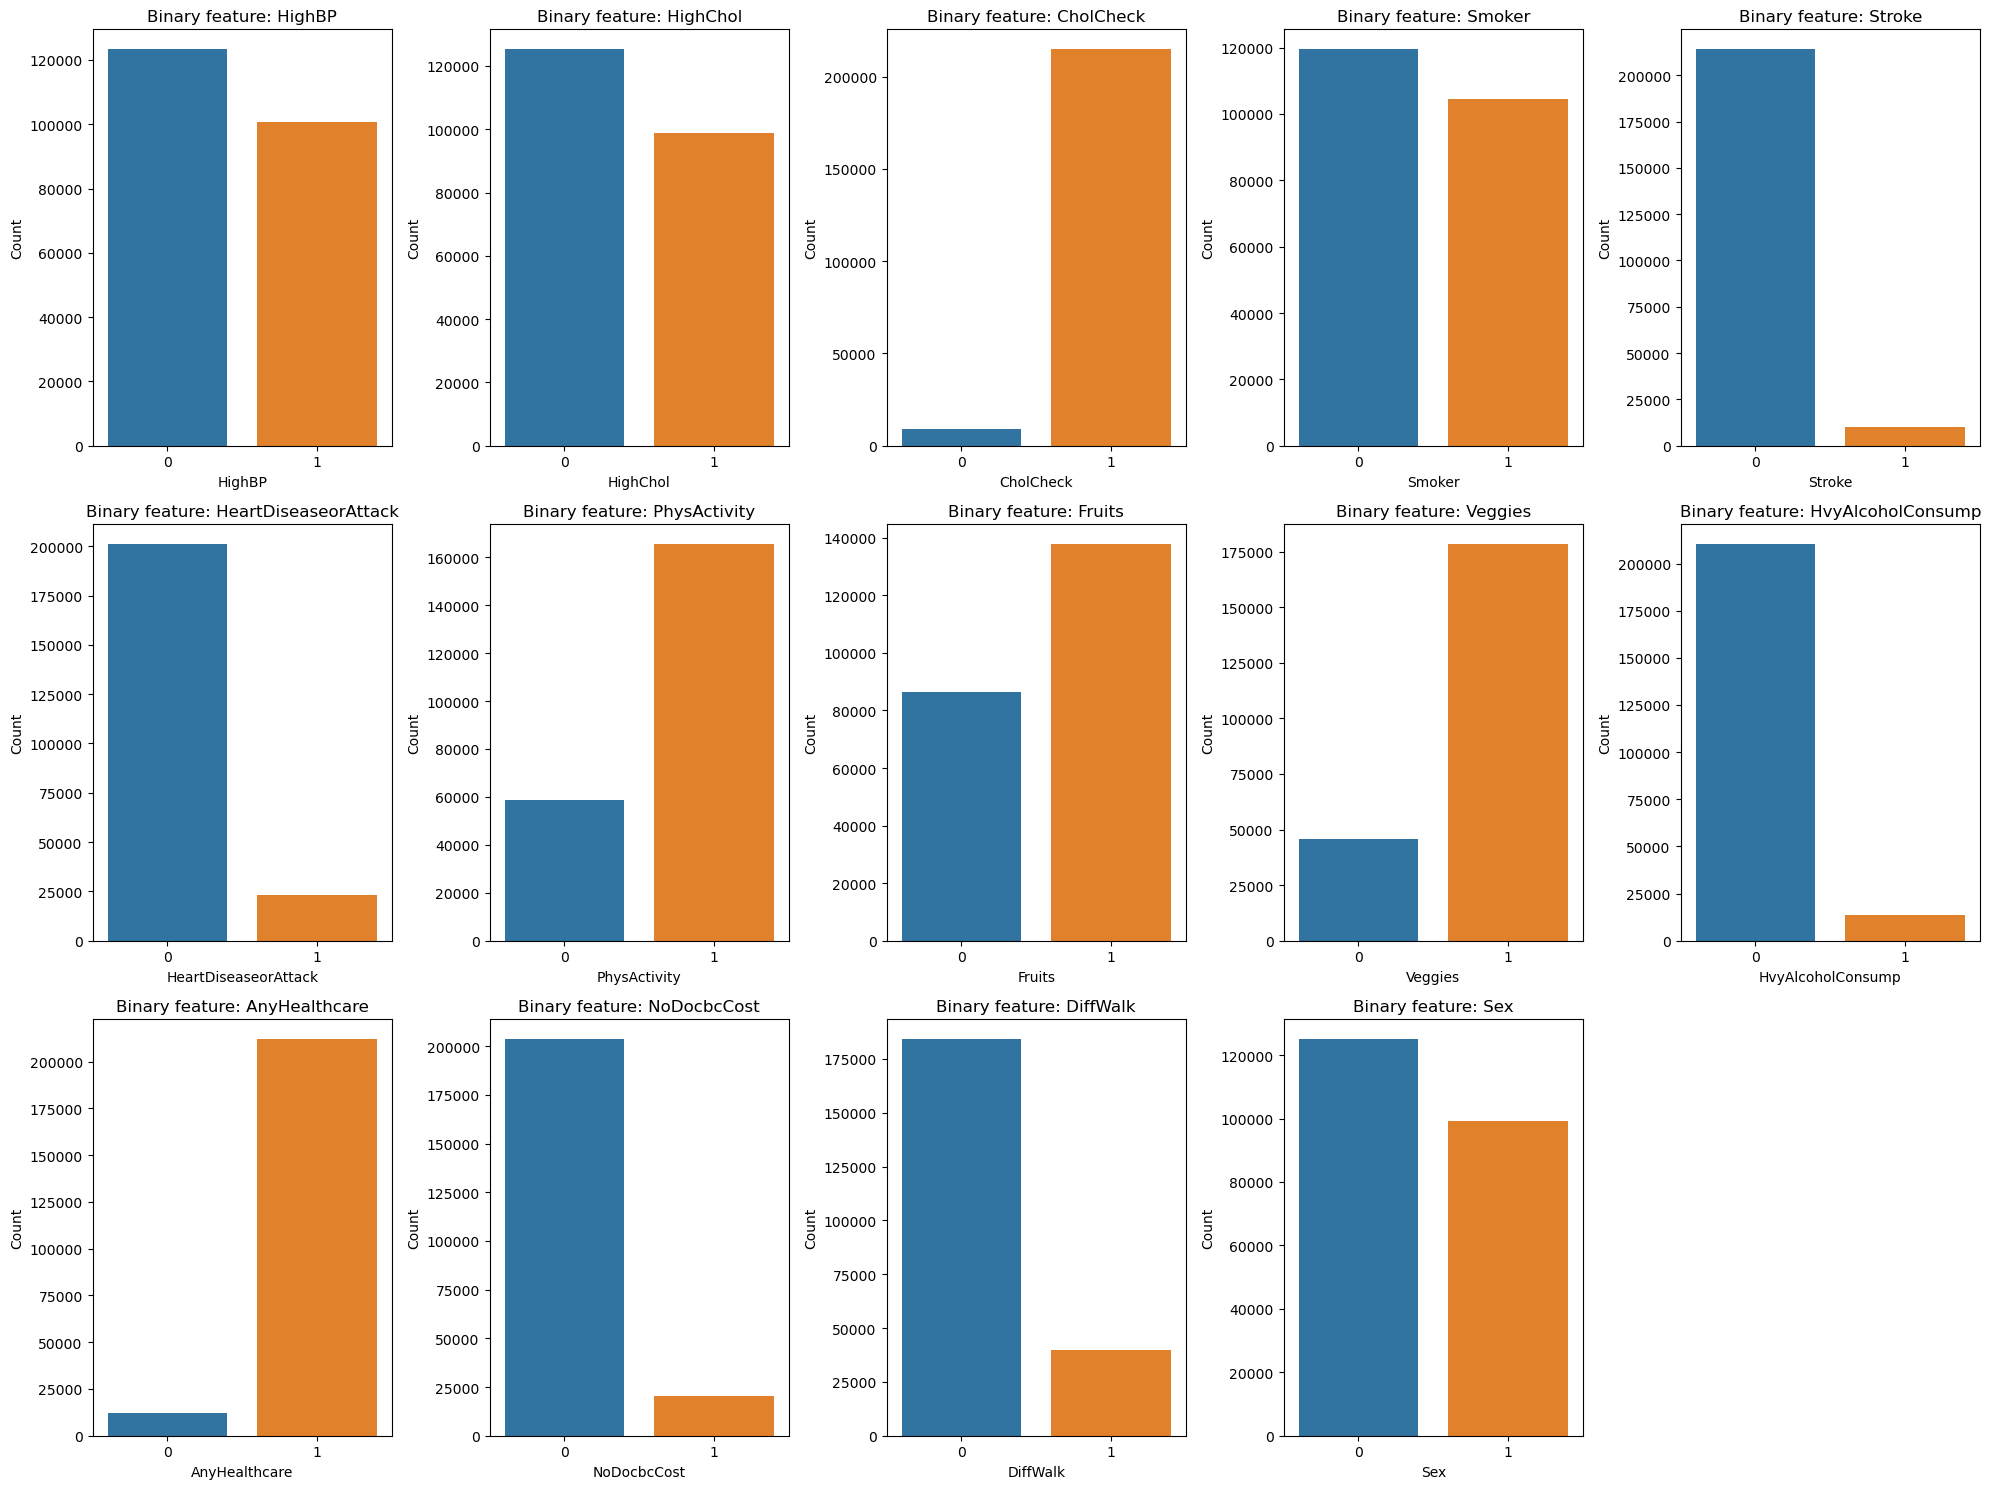

In [104]:
#  Bar Plots for Binary Features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

def plot_bar_features(data_cleaned, features):
    num_features = len(features)
    num_cols = 5
    num_rows = (num_features + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=data_cleaned, ax=axes[i])
        axes[i].set_title(f'Binary feature: {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Create bar plots for binary features
plot_bar_features(data_cleaned, binary_features)

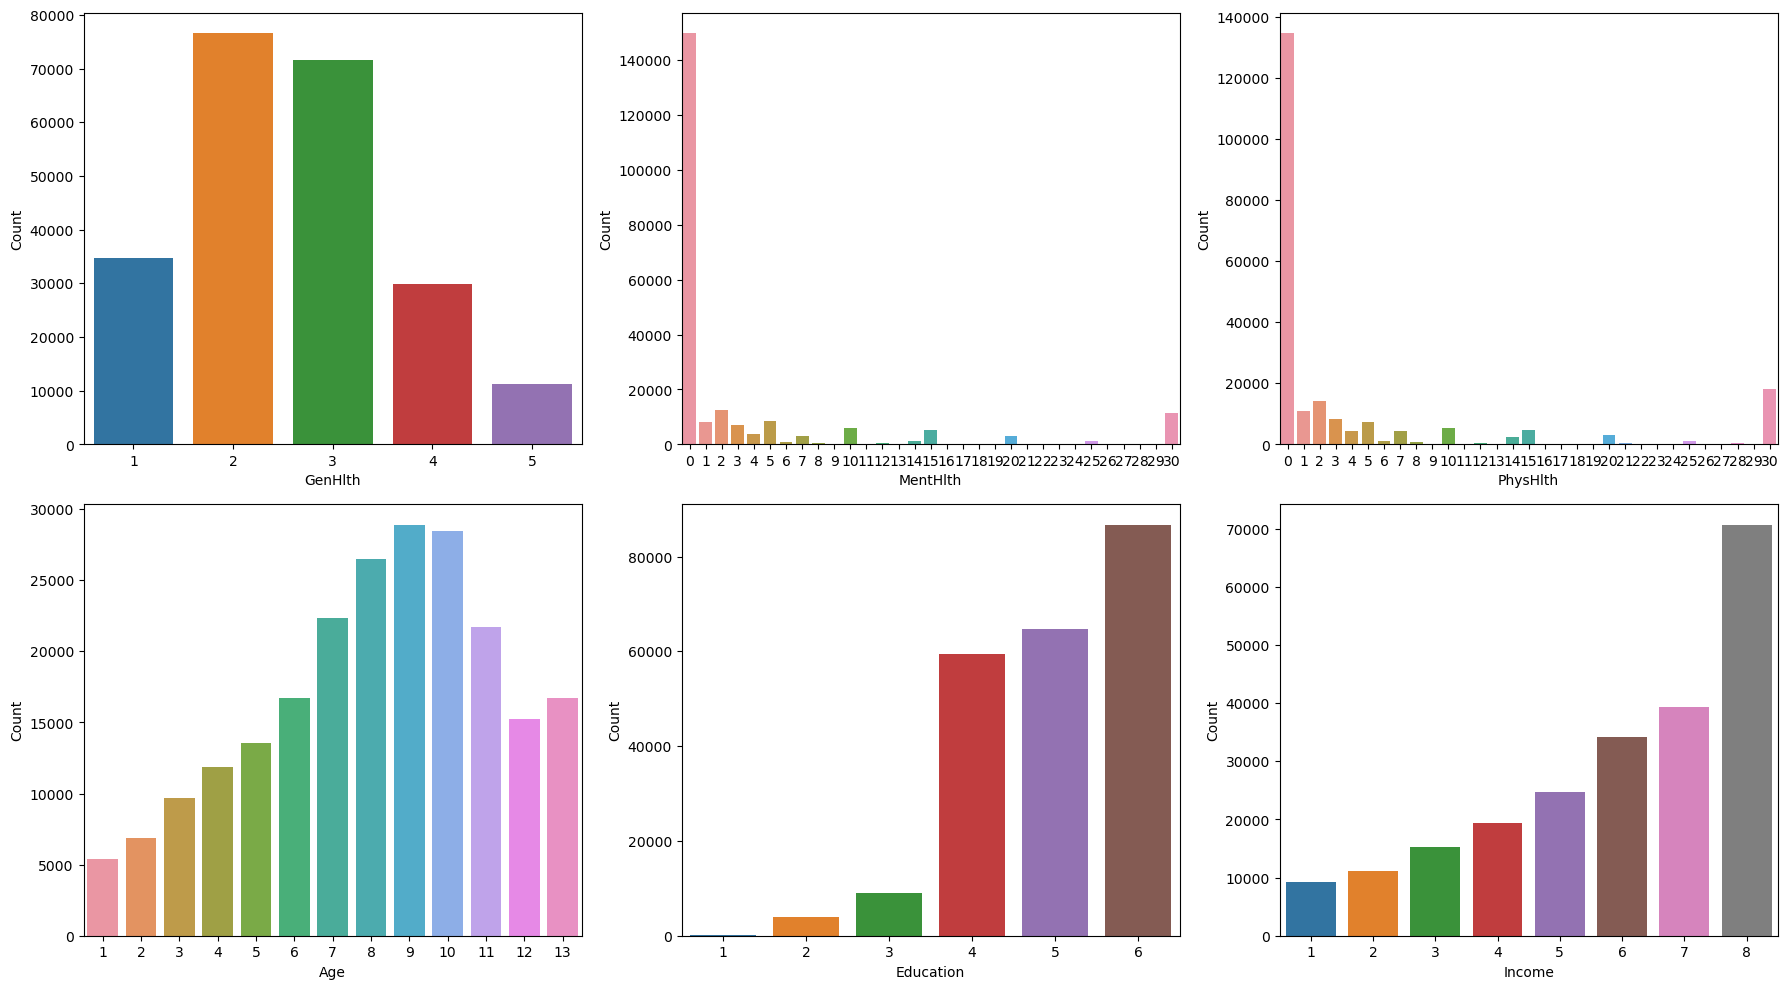

In [105]:
#  Bar Plots for Categorical Features
categorical_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
# Function to create bar plots for categorical features
def plot_bar_features(data_cleaned, features):
    num_features = len(features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=data_cleaned, ax=axes[i])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Create bar plots for categorical features
plot_bar_features(data_cleaned, categorical_features)

#### There are 21 predictor variables and 1 response variable, so it will create 231 scatterplots if I use pair plot to explore the relationships between features. To reduce the complexity, I divided the features into 3 groups, and there are 147 pair plots.

#### Data Dictionary

"Diabetes_012":			0 = no diabetes, 1 = prediabetes or diabetes

"HighBP":		            0 = no high BP, 1 = high BP

"HighChol":		0 = no high cholesterol, 1 = high cholesterol		

"CholCheck":		0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years	

"BMI":		Body Mass Index		


"Smoker":  	Have you smoked at least 100 cigarettes in your entire life? 0 = no, 1 = yes

"Stroke":		(Ever told) you had a stroke. 0 = no, 1 = yes

"HeartDiseaseorAttack":		coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes	


"PhysActivity":		physical activity in past 30 days - not including job. 0 = no, 1 = yes

"Fruits":		Consume Fruit 1 or more times per day. 0 = no, 1 = yes	

"Veggies":	 		Consume Vegetables 1 or more times per day. 0 = no, 1 = yes	


"HvyAlcoholConsump":	 	Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no, 1 = yes	

"AnyHealthcare":	 	Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes

"NoDocbcCost":	 		Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes		


"GenHlth":	 	Would you say that in general your health is: scale 1-5, 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor			


"PhysHlth":	 		Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days		

"MentHlth":	 	Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

"DiffWalk":	 	Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes	

"Sex":	 		0 = female, 1 = male	

"Age":	 	13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or older

"Education":		Education Level	Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten, 2 = Grades 1, through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate)

"Income":	   	  	Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more

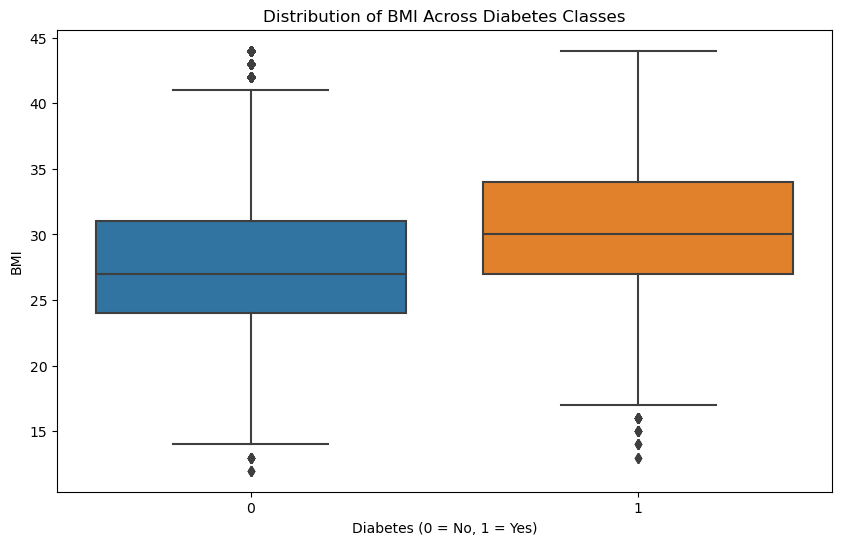

In [106]:
# BMI is the only originally numerical variable, and others are categorical features

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data = data_cleaned)
plt.title('Distribution of BMI Across Diabetes Classes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

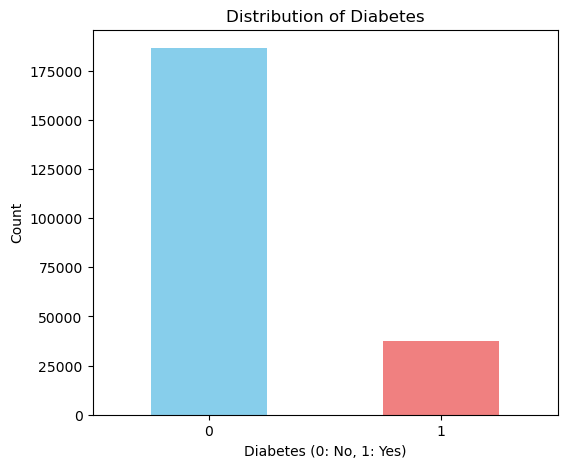

Diabetes_012
0    186589
1     37485
Name: count, dtype: int64

In [107]:

# Get the count of records in each category for the 'Diabetes_012' column
diabetes_counts = data_cleaned['Diabetes_012'].value_counts()

# Create the plot
plt.figure(figsize=(6, 5))  # Adjust figure size as needed 
diabetes_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Colors for each value (0, 1)

# Set labels and title
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')

# Rotate the x-axis labels
plt.xticks(rotation=360)

# Display the plot
plt.show()

category_counts = data_cleaned['Diabetes_012'].value_counts()
category_counts

In [113]:
# turn "BMI" into a categorical variable

# Divide "BMI" into part: 1 = 'Underweight'(0 < BMI < 18), 2 = 'Normal Weight'(18 =< BMI < 25), 3 ='Overweight'(25 =< BMI < 30), 4 = 'Obese'(30 =< BMI)
bmi_categories = ['1', '2', '3', '4']
bmi_cuts = [0, 18, 25, 30, float('inf')]  # float('inf') for values above 30

# Create a new categorical column based on BMI using cut
data_cleaned['BMI'] = pd.cut(data_cleaned['BMI'], bins=bmi_cuts, labels=bmi_categories)

print(data_cleaned.head())  # Display the first few rows to see the new column

   Diabetes_012  HighBP  HighChol  CholCheck BMI  Smoker  Stroke  \
0             0       1         1          1   4       1       0   
1             0       0         0          0   2       1       0   
2             0       1         1          1   3       0       0   
3             0       1         0          1   3       0       0   
4             0       1         1          1   2       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1            0        5        18   

In [114]:
data_cleaned['BMI'] = data_cleaned['BMI'].astype('int32')

In [115]:
print(data_cleaned.dtypes)

Diabetes_012            int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object


In [117]:
# Feature Selection

X = data_cleaned.drop(columns=['Diabetes_012'])
y = data_cleaned['Diabetes_012']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=2024)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Set a threshold for feature importance (example: keep top 2 features)
threshold = feature_importance_df['Importance'].quantile(0.5)  # Keep features above 50th percentile

# Select features that meet the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']
print(f"Selected features: {selected_features.tolist()}")

# Create a new dataset with only the selected features
X_selected = X[selected_features]
print(X_selected)

                 Feature  Importance
18                   Age    0.147613
20                Income    0.124207
15              PhysHlth    0.100244
19             Education    0.086548
14              MentHlth    0.077007
13               GenHlth    0.072903
3                    BMI    0.051344
0                 HighBP    0.043910
4                 Smoker    0.038470
8                 Fruits    0.038449
7           PhysActivity    0.031204
9                Veggies    0.031031
17                   Sex    0.030873
1               HighChol    0.028003
16              DiffWalk    0.023870
6   HeartDiseaseorAttack    0.019432
12           NoDocbcCost    0.017284
5                 Stroke    0.014058
11         AnyHealthcare    0.009980
10     HvyAlcoholConsump    0.009001
2              CholCheck    0.004569
Selected features: ['Age', 'Income', 'PhysHlth', 'Education', 'MentHlth', 'GenHlth', 'BMI', 'HighBP', 'Smoker', 'Fruits', 'PhysActivity']
        Age  Income  PhysHlth  Education  MentHl

In [113]:
# Decision Tree
# Define the features (predictors) and target variable (outcome)
features = ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth', 'HighBP', 'Fruits', 'Smoker', 'PhysActivity']
target = 'Diabetes_012' 

# Create the Decision Tree model
model_1 = DecisionTreeClassifier()

# Train the model on the training data
model_1.fit(X_train, y_train)

# Make predictions on the testing data
predictions_1 = model_1.predict(X_test)

# You can evaluate the model performance using metrics like accuracy, precision, recall, etc.
# (Replace 'accuracy' with the desired evaluation metric)

accuracy = accuracy_score(y_test, predictions_1)
recall = recall_score(y_test, predictions_1)
precision = precision_score(y_test, predictions_1)
f1 = f1_score(y_test, predictions_1)
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions_1)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.7650117148276246
Recall: 0.32184974161918645
Precision: 0.3097424126498342
F1 Score: 0.31568003119111054
ROC-AUC: 0.5883022455010175


In [114]:
# Random Forest
# Create the Random Forest model
model_2 = RandomForestClassifier(n_estimators=100)  

# Train the model on the training data
model_2.fit(X_train, y_train)

# Make predictions on the testing data
predictions_2 = model_2.predict(X_test)

# You can evaluate the model performance using metrics like accuracy, precision, recall, etc.

accuracy = accuracy_score(y_test, predictions_2)
recall = recall_score(y_test, predictions_2)
precision = precision_score(y_test, predictions_2)
f1 = f1_score(y_test, predictions_2)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions_2)



print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8219792480196363
Recall: 0.1939843646482046
Precision: 0.4358440011908306
F1 Score: 0.2684760682193288
ROC-AUC: 0.5715682261150222


In [115]:
# specify the weights based on the ratio of the classes(but it seems worse)

# Create the Random Forest model

weight_for_0 = 1
weight_for_1 = 190055 / 39657  
class_weights = {0: weight_for_0, 1: weight_for_1}

model_3 = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=2024)
# Train the model on the training data
model_3.fit(X_train, y_train)

# Make predictions on the testing data
predictions_3 = model_3.predict(X_test)

# Evaluate the model performance using metrics

accuracy = accuracy_score(y_test, predictions_3)
recall = recall_score(y_test, predictions_3)
precision = precision_score(y_test, predictions_3)
f1 = f1_score(y_test, predictions_3)
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions_3)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8140577931496151
Recall: 0.19159931098449715
Precision: 0.3931484502446982
F1 Score: 0.2576391982182628
ROC-AUC: 0.5658543941420285


In [116]:
# XGBoost model
# Define features and target variable
features = ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth', 'HighBP', 'Fruits', 'Smoker', 'PhysActivity']
target = 'Diabetes_012'

# Split data into features and target
X = data_cleaned[features]
y = data_cleaned[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# One-Hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['category']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['category']))

# Convert encoded arrays back to DataFrames with appropriate indices
X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index)

# Combine encoded categorical features with binary features
X_train_combined = pd.concat([X_train.select_dtypes(exclude=['category']).reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test.select_dtypes(exclude=['category']).reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Check the shapes
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Ensure the indices are properly aligned
assert X_train_combined.shape[0] == y_train.shape[0], "Mismatch in number of rows between X_train and y_train"
assert X_test_combined.shape[0] == y_test.shape[0], "Mismatch in number of rows between X_test and y_test"

# Create the XGBoost model
model_4 = XGBClassifier(objective='binary:logistic', random_state=42)  # Adjust objective for other classification problems

# Train the model on the training data
model_4.fit(X_train_combined, y_train)

# Make predictions on the testing data
predictions_4 = model_4.predict(X_test_combined)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions_4)
recall = recall_score(y_test, predictions_4)
precision = precision_score(y_test, predictions_4)
f1 = f1_score(y_test, predictions_4)
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions_4)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

X_train_combined shape: (179259, 14)
X_test_combined shape: (44815, 14)
y_train shape: (179259,)
y_test shape: (44815,)
Accuracy: 0.8348320874707129
Recall: 0.14562077646747051
Precision: 0.5353141743789577
F1 Score: 0.22895833333333335
ROC-AUC: 0.5600112039469476


In [117]:
# convert categorical variables "GenHlth", "MentHlth", "PhysHlth" into binary

# Define the threshold of "MentHlth" and "PhysHlth"
threshold = 9

# Create a new binary column using boolean indexing
data_cleaned['MentHlth_Binary'] = np.where(data_cleaned['MentHlth'] > threshold, 1, 0)
data_cleaned['PhysHlth_Binary'] = np.where(data_cleaned['PhysHlth'] > threshold, 1, 0)

# Define the threshold of "GenHlth"
threshold_2 = 2
data_cleaned['GenHlth_Binary'] = np.where(data_cleaned['GenHlth'] > threshold_2, 1, 0)

# Define the threshold of "Education"
threshold_3 = 4
data_cleaned['Education'] = np.where(data_cleaned['Education'] > threshold_3, 1, 0)

In [118]:
# Define the threshold of "Education"
threshold_4 = 6
data_cleaned['Income_Binary'] = np.where(data_cleaned['Income'] > threshold_4, 1, 0)

In [119]:
# combine the categories of "Age" into 3 classes

# Define the mapping dictionary
age_mapping = {1: 1, 2: 1, 3: 1, 
               4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2,  
               10: 3, 11: 3, 12: 3, 13: 3}

# Create a new column "Age_Group" based on the mapping
data_cleaned['Age_Group'] = data_cleaned['Age'].map(age_mapping)



In [120]:

# Define the categorical variables to be one-hot encoded
categorical_vars = ['BMI', 'Age_Group']

# Initialize the SimpleImputer with a placeholder (e.g., most frequent value)
imputer = SimpleImputer(strategy='most_frequent')

# Impute the null values in the categorical variables
data_cleaned[categorical_vars] = imputer.fit_transform(data_cleaned[categorical_vars])

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical variables
encoded_data = encoder.fit_transform(data_cleaned[categorical_vars])

# Convert the encoded array to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_vars))

# Ensure the indices align before concatenation
encoded_df.reset_index(drop=True, inplace=True)
data_cleaned.reset_index(drop=True, inplace=True)

# Drop the original categorical columns
data_cleaned.drop(columns=categorical_vars, inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame
data_cleaned = pd.concat([data_cleaned, encoded_df], axis=1)

# Verify the result
print(data_cleaned)



        Diabetes_012  HighBP  HighChol  CholCheck  Smoker  Stroke  \
0                  0       1         1          1       1       0   
1                  0       0         0          0       1       0   
2                  0       1         1          1       0       0   
3                  0       1         0          1       0       0   
4                  0       1         1          1       0       0   
...              ...     ...       ...        ...     ...     ...   
224069             0       0         0          1       0       0   
224070             1       1         1          1       0       0   
224071             0       0         0          1       0       0   
224072             0       1         0          1       0       0   
224073             1       1         1          1       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                          0             0       0        1   
1                          0             1   

In [121]:
pd.set_option('display.max_columns', None)

data_cleaned.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_Binary,PhysHlth_Binary,GenHlth_Binary,Income_Binary,BMI_1,BMI_2,BMI_3,BMI_4,Age_Group_1,Age_Group_2,Age_Group_3
0,0,1,1,1,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,0,3,1,1,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,1,1,0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1,1,1,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,0,8,1,1,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,1,0,1,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,0,6,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,1,1,1,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,1,4,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [122]:
# Drop multiple columns 
data_cleaned = data_cleaned.drop(columns=['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'Veggies',	'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'HighChol', 'CholCheck',	'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', ])
pd.set_option('display.max_columns', None)
data_cleaned.head(5)

,Diabetes_012,HighBP,Smoker,Fruits,Sex,MentHlth_Binary,PhysHlth_Binary,GenHlth_Binary,Income_Binary,BMI_1,BMI_2,BMI_3,BMI_4,Age_Group_1,Age_Group_2,Age_Group_3
0,0,1,1,0,0,1,1,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,1,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,1,0,1,1,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,1,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,1,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [123]:


features = data_cleaned.drop(columns=['Diabetes_012'])  # All columns except the last one (target)
target = data_cleaned['Diabetes_012']

# Select features using drop with axis=1 to exclude the target column
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2024)

# Create the model with desired parameters
model_5 = LogisticRegression(solver='liblinear') 

# Train the model on the training data
model_5.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_5.predict(X_test)

# Use metrics like accuracy, precision, recall, F1-score to evaluate performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("ROC-AUC:", roc_auc)

Accuracy: 0.8329354010933839
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     37268
           1       0.53      0.08      0.14      7547

    accuracy                           0.83     44815
   macro avg       0.68      0.53      0.52     44815
weighted avg       0.79      0.83      0.78     44815

Precision: 0.5260869565217391
Recall: 0.08016430369683318
F1 Score: 0.13912843509256065
ROC-AUC: 0.5327702488753565


In [126]:

# Define a range of K values to explore (adjust as needed)
k_range = range(1, 21)

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a dictionary of hyperparameters to search over
param_grid = dict(n_neighbors=k_range)

# Use GridSearchCV to find the best K value based on recall
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best K value and model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Evaluate the model's performance with the best K for recall
y_pred = best_model.predict(X_test)
recall = recall_score(y_test, y_pred)

print("Best K for Highest Recall:", best_k)
print("Recall with Best K:", recall)


Best K for Highest Recall: 1
Recall with Best K: 0.2583808135683053


In [128]:
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)

Accuracy: 0.757447283275689
Precision: 0.2699709262079468
Recall: 0.2583808135683053
F1 Score: 0.2640487474610697
Confusion Matrix:
 [[31995  5273]
 [ 5597  1950]]
ROC-AUC: 0.5584460684778308


In [41]:
features = data_cleaned.drop(columns=['Diabetes_012'])  # All columns except the last one (target)
target = data_cleaned['Diabetes_012']

# Select features using drop with axis=1 to exclude the target column
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2024)

# Create a RandomUnderSampler object (adjust parameters if needed)
rus = RandomUnderSampler(random_state= 8083)

# Undersample the majority class
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Print the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_train_resampled))

Class distribution after undersampling: Counter({0: 29938, 1: 29938})


In [48]:
X_test['BMI'] = X_test['BMI'].astype('int32')

In [49]:
# List of specific features to select
specific_features = ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth', 'HighBP', 'Fruits', 'Smoker', 'PhysActivity']

# Subset X_train_resampled to include only specific features
X_train_selected = X_train_resampled[specific_features]

#Train a Logistic Regression model on selected features
model_11 = LogisticRegression()
model_11.fit(X_train_selected, y_train_resampled)

# Prepare test set with selected features
X_test_selected = X_test[specific_features]

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)

Accuracy: 0.6989624009818142
Precision: 0.3265032107413894
Recall: 0.7410891745064264
F1 Score: 0.4532965919682295
Confusion Matrix:
 [[25731 11537]
 [ 1954  5593]]
ROC-AUC: 0.7157603219317579


In [52]:
# Decision Tree
# Define the features (predictors) and target variable (outcome)
features = ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth', 'HighBP', 'Fruits', 'Smoker', 'PhysActivity']
target = 'Diabetes_012' 

# Create the Decision Tree model
model_12 = DecisionTreeClassifier()

# Train the model on the training data
model_12.fit(X_train_selected, y_train_resampled)

# Make predictions on the testing data
predictions_12 = model_12.predict(X_test_selected)

# You can evaluate the model performance using metrics like accuracy, precision, recall, etc.
# (Replace 'accuracy' with the desired evaluation metric)

accuracy = accuracy_score(y_test, predictions_12)
recall = recall_score(y_test, predictions_12)
precision = precision_score(y_test, predictions_12)
f1 = f1_score(y_test, predictions_12)
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions_12)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.6468146825839562
Recall: 0.6031535709553465
Precision: 0.26183491515674434
F1 Score: 0.3651532167495588
ROC-AUC: 0.6294049490496384


In [53]:
# Random Forest
# Create the Random Forest model
model_13 = RandomForestClassifier(n_estimators=100)  

# Train the model on the training data
model_13.fit(X_train_selected, y_train_resampled)

# Make predictions on the testing data
predictions_13 = model_13.predict(X_test_selected)

# You can evaluate the model performance using metrics like accuracy, precision, recall, etc.

accuracy = accuracy_score(y_test, predictions_13)
recall = recall_score(y_test, predictions_13)
precision = precision_score(y_test, predictions_13)
f1 = f1_score(y_test, predictions_13)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions_13)



print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.6657815463572465
Recall: 0.7079634291771565
Precision: 0.29491637688359
F1 Score: 0.4163809226932668
ROC-AUC: 0.6826014419686361


In [59]:

# XGBoost Model
# Create the Gradient Boosting model
model_gb = XGBClassifier(n_estimators=100, random_state=2024)  

# Train the model on the training data
model_gb.fit(X_train_selected, y_train_resampled)

# Make predictions on the testing data
predictions_gb = model_gb.predict(X_test_selected)

# Evaluate the model performance using metrics like accuracy, precision, recall, etc.

accuracy_gb = accuracy_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)
precision_gb = precision_score(y_test, predictions_gb)
f1_gb = f1_score(y_test, predictions_gb)

# Calculate ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, predictions_gb)

print("XGBoost Model Performance")
print("Accuracy:", accuracy_gb)
print("Recall:", recall_gb)
print("Precision:", precision_gb)
print("F1 Score:", f1_gb)
print("ROC-AUC:", roc_auc_gb)


XGBoost Model Performance
Accuracy: 0.6853508869798058
Recall: 0.7555319994699881
Precision: 0.3175186546386012
F1 Score: 0.44712801411487946
ROC-AUC: 0.7133353890233916


In [55]:
# Define a range of K values to explore (adjust as needed)
k_range = range(1, 21)

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a dictionary of hyperparameters to search over
param_grid = dict(n_neighbors=k_range)

# Use GridSearchCV to find the best K value based on recall
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall')
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best K value and model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Evaluate the model's performance with the best K for recall
y_pred = best_model.predict(X_test_selected)
recall = recall_score(y_test, y_pred)

print("Best K for Highest Recall:", best_k)
print("Recall with Best K:", recall)

Best K for Highest Recall: 19
Recall with Best K: 0.6077911753014443


In [56]:
knn = KNeighborsClassifier(n_neighbors=19)

# Train the model
knn.fit(X_train_selected, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)



Accuracy: 0.7234854401428094
Precision: 0.3271988016263642
Recall: 0.6077911753014443
F1 Score: 0.4253918204581285
Confusion Matrix:
 [[27836  9432]
 [ 2960  4587]]
ROC-AUC: 0.6773527090417277


Gradient Boosting Model Performance
Accuracy: 0.7104673181986374
Recall: 0.7743020937188435
Precision: 0.3509376412110258
F1 Score: 0.4829757462686567
ROC-AUC: 0.735630700858736
Feature ranking:
1. feature HighBP (0.3286274261619806)
2. feature GenHlth (0.25635875649435524)
3. feature BMI (0.1389825848163431)
4. feature Age (0.121885672452021)
5. feature HighChol (0.07521617480100107)
6. feature HeartDiseaseorAttack (0.01721975733836166)
7. feature HvyAlcoholConsump (0.012641988306605005)
8. feature CholCheck (0.012393107341237997)
9. feature Income (0.011123487210986296)
10. feature Sex (0.009827284509077949)
11. feature DiffWalk (0.006578874037827467)
12. feature MentHlth (0.0029719195445096565)
13. feature PhysHlth (0.002259752600113814)
14. feature Education (0.0019205534282991234)
15. feature Stroke (0.0011356472528079025)
16. feature NoDocbcCost (0.00040087718316498974)
17. feature Smoker (0.0002311196911738565)
18. feature AnyHealthcare (0.00017031092866952788)
19. feature Veggi

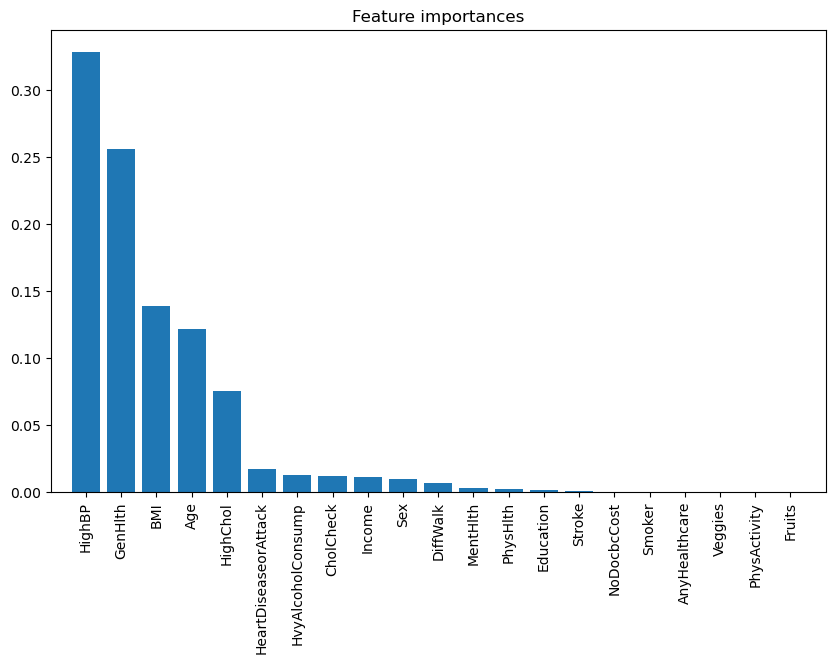

In [94]:

features = data_cleaned.drop(columns=['Diabetes_012'])  # All columns except the target
target = data_cleaned['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2024)

# Create a RandomUnderSampler object (adjust parameters if needed)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=8083)

# Undersample the majority class
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train the Gradient Boosting model
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
predictions_gb = model_gb.predict(X_test)

# Evaluate the model performance
accuracy_gb = accuracy_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)
precision_gb = precision_score(y_test, predictions_gb)
f1_gb = f1_score(y_test, predictions_gb)
roc_auc_gb = roc_auc_score(y_test, predictions_gb)

print("Gradient Boosting Model Performance")
print("Accuracy:", accuracy_gb)
print("Recall:", recall_gb)
print("Precision:", precision_gb)
print("F1 Score:", f1_gb)
print("ROC-AUC:", roc_auc_gb)

# Extract and plot feature importances
importances = model_gb.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_resampled.shape[1]):
    print(f"{f + 1}. feature {features.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_resampled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_resampled.shape[1]), [features.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train_resampled.shape[1]])
plt.show()


In [96]:
# List of specific features to select
specific_features_2 = ['HighBP', 'GenHlth', 'Age', 'BMI', 'HighChol', 'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Income', 'CholCheck', 'DiffWalk', 'Sex']

# Subset X_train_resampled to include only specific features
X_train_selected = X_train_resampled[specific_features_2]

#Train a Logistic Regression model on selected features
model_31 = LogisticRegression()
model_31.fit(X_train_selected, y_train_resampled)

# Prepare test set with selected features
X_test_selected = X_test[specific_features_2]

# Make predictions
y_pred = model_31.predict(X_test_selected)

# Evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)


Accuracy: 0.7142110876520906
Precision: 0.351862597191598
Recall: 0.7557328015952144
F1 Score: 0.4801647002929765
Confusion Matrix:
 [[26749 11170]
 [ 1960  6064]]
ROC-AUC: 0.7305787613556387


C:\Users\bruce\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
# Decision Tree

# List of specific features to select
specific_features_2 = ['HighBP', 'GenHlth', 'Age', 'BMI', 'HighChol', 'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Income', 'CholCheck', 'DiffWalk', 'Sex']

# Subset X_train_resampled to include only specific features
X_train_selected = X_train_resampled[specific_features_2]

#Train a Logistic Regression model on selected features
model_32 = DecisionTreeClassifier()
model_32.fit(X_train_selected, y_train_resampled)

# Prepare test set with selected features
X_test_selected = X_test[specific_features_2]

# Make predictions
y_pred = model_32.predict(X_test_selected)

# Evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)


Accuracy: 0.6767516270160852
Precision: 0.29504653257280095
Recall: 0.6124127617148555
F1 Score: 0.3982333157745452
Confusion Matrix:
 [[26178 11741]
 [ 3110  4914]]
ROC-AUC: 0.651389534421604


In [119]:
# List of specific features to select
specific_features_2 = ['HighBP', 'GenHlth', 'Age', 'BMI', 'HighChol', 'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Income', 'CholCheck', 'DiffWalk', 'Sex']

# Subset X_train_resampled to include only specific features
X_train_selected = X_train_resampled[specific_features_2]

#Train a Logistic Regression model on selected features
model_33 = RandomForestClassifier(n_estimators=100) 
model_33.fit(X_train_selected, y_train_resampled)

# Prepare test set with selected features
X_test_selected = X_test[specific_features_2]

# Make predictions
y_pred = model_33.predict(X_test_selected)

# Evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)


Accuracy: 0.6812674327792034
Precision: 0.3074812825055724
Recall: 0.7128660394858884
F1 Score: 0.4296438268647181
Confusion Matrix:
 [[25151 12117]
 [ 2167  5380]]
ROC-AUC: 0.6938672796978652


In [120]:
# XGBoost Model
# Create the Gradient Boosting model
model_gb = XGBClassifier(n_estimators=100, random_state=2024)  

# Train the model on the training data
model_gb.fit(X_train_selected, y_train_resampled)

# Make predictions on the testing data
predictions_gb = model_gb.predict(X_test_selected)

# Evaluate the model performance using metrics like accuracy, precision, recall, etc.

accuracy_gb = accuracy_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)
precision_gb = precision_score(y_test, predictions_gb)
f1_gb = f1_score(y_test, predictions_gb)

# Calculate ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, predictions_gb)

print("XGBoost Model Performance")
print("Accuracy:", accuracy_gb)
print("Recall:", recall_gb)
print("Precision:", precision_gb)
print("F1 Score:", f1_gb)
print("ROC-AUC:", roc_auc_gb)

XGBoost Model Performance
Accuracy: 0.6958607609059466
Recall: 0.7732873989664767
Precision: 0.3286961419318502
F1 Score: 0.4613074065291281
ROC-AUC: 0.7267343939127757


In [121]:
# Define a range of K values to explore (adjust as needed)
k_range = range(1, 21)

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a dictionary of hyperparameters to search over
param_grid = dict(n_neighbors=k_range)

# Use GridSearchCV to find the best K value based on recall
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall')
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best K value and model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Evaluate the model's performance with the best K for recall
y_pred = best_model.predict(X_test_selected)
recall = recall_score(y_test, y_pred)

print("Best K for Highest Recall:", best_k)
print("Recall with Best K:", recall)

Best K for Highest Recall: 19
Recall with Best K: 0.49940373658407317


In [122]:
knn = KNeighborsClassifier(n_neighbors=19)

# Train the model
knn.fit(X_train_selected, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)


Accuracy: 0.777976124065603
Precision: 0.379136907755759
Recall: 0.49940373658407317
F1 Score: 0.4310384263494968
Confusion Matrix:
 [[31096  6172]
 [ 3778  3769]]
ROC-AUC: 0.6668962441640984


Accuracy: 0.6823608166908401
Recall: 0.7392341327679873
Precision: 0.3126190743023647
F1 Score: 0.43941243649824757
ROC-AUC: 0.705038875979357
                 Feature  Importance
18                   Age    0.154361
20                Income    0.108430
13               GenHlth    0.096611
15              PhysHlth    0.083839
19             Education    0.075009
0                 HighBP    0.067561
14              MentHlth    0.065461
3                    BMI    0.060226
1               HighChol    0.036525
4                 Smoker    0.034959
8                 Fruits    0.034654
17                   Sex    0.030478
7           PhysActivity    0.027873
9                Veggies    0.027223
16              DiffWalk    0.024336
6   HeartDiseaseorAttack    0.019078
12           NoDocbcCost    0.014482
5                 Stroke    0.011783
10     HvyAlcoholConsump    0.011050
11         AnyHealthcare    0.009064
2              CholCheck    0.007000


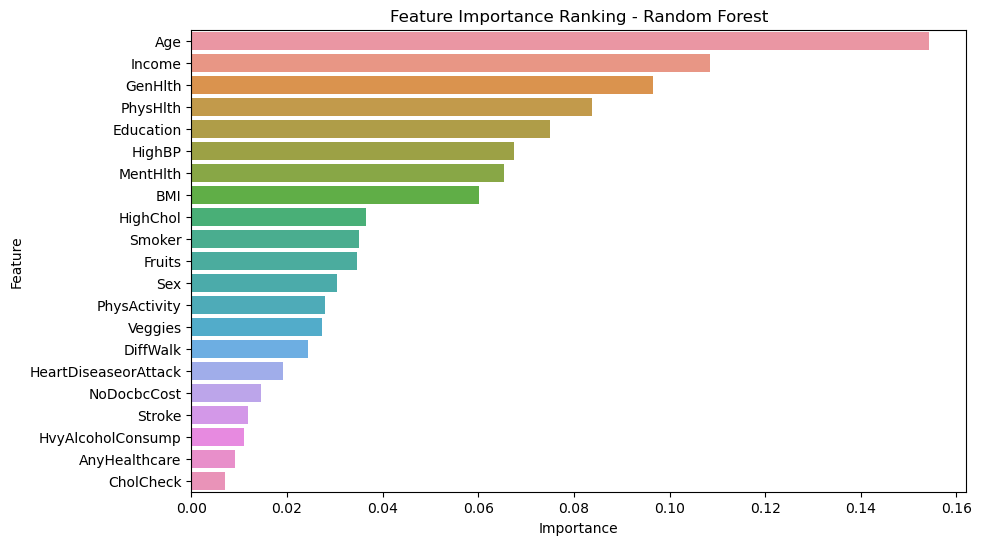

In [118]:


features = data_cleaned.drop(columns=['Diabetes_012'])  # All columns except the target
target = data_cleaned['Diabetes_012']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2024)

# Random undersampling to balance the classes
rus = RandomUnderSampler(random_state=8083)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train a Random Forest model on the full feature set
model_41 = RandomForestClassifier(n_estimators=100, random_state=2024)
model_41.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
predictions_41 = model_41.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions_41)
recall = recall_score(y_test, predictions_41)
precision = precision_score(y_test, predictions_41)
f1 = f1_score(y_test, predictions_41)
roc_auc = roc_auc_score(y_test, predictions_41)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

# Variable importance ranking
importances = model_41.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print variable importance ranking
print(feature_importance_df)

# Plot the variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Ranking - Random Forest')
plt.show()
